# 单变量非线性变化

我们刚刚看到，添加特征的平方或立方可以改进线性回归模型。其他变换通常也对变换某些特征有用，特别是应用数学函数，比如 log、exp 或sin。虽然基于树的模型只关注特征的顺序，但线性模型和神经网络依赖于每个特征的尺度和分布。如果在特征和目标之间有在非线性关系，那么建模就变得非常困难，特别是对于回归问题。log和exp 函数可以帮助调节数据的相对比例，从而改进线性模型或神经网络的学习效果。在处理具有周期性模式的数据时，sin和cos 函数非常有用。

大部分模型都在每个特征(在回归问题中还包括目标值) 大致遵循高斯分布时表现最好也就是说，每个特征的直方图应该具有类似于熟悉的“钟形曲线”的形状。使用诸如 log和exp 之类的变换并不稀奇，但却是实现这一点的简单又有效的方法。在一种特别常见的情况下，这样的变换非常有用，就是处理整数计数数据时。计数数据是指类似“用户A多长时间登录一次?”这样的特征。计数不可能取负值，并且通常遵循特定的统计模式。下面我们使用一个模拟的计数数据集，其性质与在自然状态下能找到的数据集类似。特征全都是整数值，而响应是连续的:

In [1]:
import numpy as np
rnd = np.random.RandomState(0) # 创建一个特定种子（seed）为 0 的随机数生成器的实例
# 使用一个随机数生成器（可能是 NumPy 中的 np.random 模块）生成一个形状为 (1000, 3) 的二维数组
# 其中的元素是从标准正态分布（均值为 0，标准差为 1）中随机抽取的值。
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3) #使用一个随机数生成器（可能是 NumPy 中的 np.random 模块）生成一个具有形状 (3,) 的一维数组，其中的元素是从标准正态分布（均值为 0，标准差为 1）中随机抽取的值。
# 使用一个随机数生成器（生成一个服从泊松分布的随机数数组
# 其中的随机事件率（lambda）由 10 * np.exp(X_org) 确定。
X= rnd.poisson(10 * np.exp(X_org)) 
y = np.dot(X_org, w) # 点乘

In [11]:
np.set_printoptions(precision=3, suppress=True, floatmode='fixed')
print(X_org)
print('\n')
print(w)
print('\n')
print(X)
print('\n')
print(y[:20])

[[ 1.764  0.400  0.979]
 [ 2.241  1.868 -0.977]
 [ 0.950 -0.151 -0.103]
 ...
 [-1.303  0.467  0.161]
 [ 0.320  2.079 -0.907]
 [-0.192 -1.213 -0.081]]


[ 1.593  0.569 -0.114]


[[56 18 27]
 [81 57  3]
 [25  9 11]
 ...
 [ 2 16 16]
 [ 7 76  4]
 [ 7  3  8]]


[ 2.926  4.744  1.439  0.570  1.231  1.405  0.305  1.618  2.784  0.405
  0.564 -3.372  2.688 -0.915 -1.551 -1.499 -2.590  0.461  0.191  0.163]


如果我们计算每个值的出现次数，那么数值的分布将变得更清楚

In [12]:
print("Number of feature appearances:\n {}".format(np.bincount(X[:, 0])))

Number of feature appearances:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


数字2似乎是最常见的，共出现了68 次 (bincount 始终从0开始)，更大数字的出现次数快速下降。但也有一些很大的数字，比如134出现了2次。

Text(0.5, 0, 'Value')

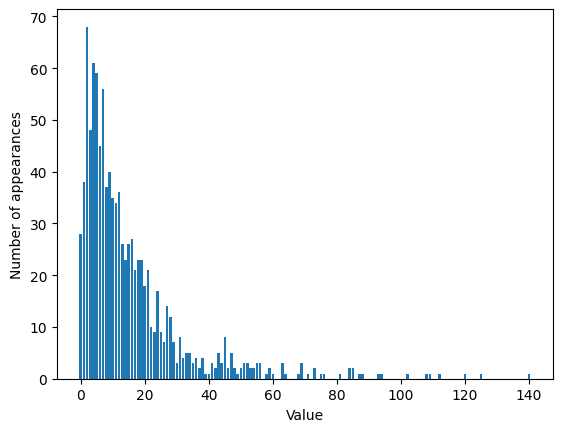

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

特征 X[:，1]和X[:，2]具有类似的性质。这种类型的数值分布(许多较小的值和一些非常大的值)在实践中非常常见。但大多数线性模型无法很好地处理这种数据。我们尝试拟合一个岭回归模型:

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


你可以从相对较小的R“分数中看出，Ridge 无法真正捕捉到X和y之间的关系。不过应用对数变换可能有用。由于数据取值中包括0(对数在0处没有定义)，所以我们不能直接应用log，而是要计算 Log(X+1):

In [32]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

变换之后，数据分布的不对称性变小，也不再有非常大的异常值

Text(0.5, 0, 'Value')

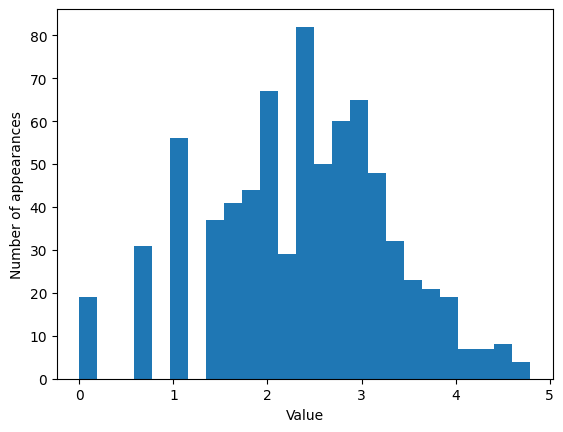

In [33]:
plt.hist(X_train_log[:, 0], bins=25)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

在新数据上构建一个岭回归模型，可以得到更好的拟合

In [35]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


为数据集和模型的所有组合寻找最佳变换，这在某种程度上是一门艺术。在这个例子中所有特征都具有相同的性质，这在实践中是非常少见的情况。通常来说，只有一部分特征应该进行变换，有时每个特征的变换方式也各不相同。前面提到过，对基于树的模型而言，这种变换并不重要，但对线性模型来说可能至关重要。对回归的目标变量y进行变换
有时也是一个好主意。尝试预测计数(比如订单数量) 是一项相当常见的任务，而且使用log(y +1)变换也往往有用。

从前面的例子中可以看出，分箱、多项式和交互项都对模型在给定数据集上的性能有很大影响，对于复杂度较低的模型更是这样，比如线性模型和朴素贝叶斯模型。与之相反，基于树的模型通常能够自己发现重要的交互项，大多数情况下不需要显式地变换数据。其他模型，比如SVM、最近邻和神经网络，有时可能会从使用分箱、交互项或多项式中受益.但其效果通常不如线性模型那么明显。